In [184]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Katib output

In [165]:
pfn_katib_string = StringIO("""
    Trial name,Status,Loss,Avg loss,Mse,Avg mse,Mae,Avg mae,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,Optimizer,Num epochs,Batch size,Data fraction
    jec-katib-pfn-regressor-open-de181d-2r76bmtw,Succeeded,7.39258e-2,8.92596e-2,1.01733e-2,1.76998e-2,7.39258e-2,8.99832e-2,1,1,2,100,1,200,0.32766,5.52255e-4,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-6lflsjrp,Succeeded,7.3721e-2,8.98642e-2,1.01323e-2,1.79665e-2,7.3721e-2,9.05891e-2,1,1,4,50,4,50,2.10846e-2,9.23666e-3,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-8lzk7r79,Succeeded,7.29921e-2,8.91116e-2,1.00174e-2,1.75306e-2,7.29921e-2,8.97978e-2,1,1,1,200,5,100,6.8074e-2,5.04111e-3,ranger,50,500,1
    jec-katib-pfn-regressor-open-de181d-czfndwdn,Succeeded,7.51231e-2,9.02183e-2,1.04694e-2,1.80972e-2,7.51231e-2,9.094e-2,1,1,5,50,2,200,0.46004,1.44214e-3,adagrad,50,500,1
    jec-katib-pfn-regressor-open-de181d-fwdvrmdr,Succeeded,7.39936e-2,8.9758e-2,1.01488e-2,1.78953e-2,7.39936e-2,9.04818e-2,1,1,4,200,1,200,0.24685,3.62935e-3,rmsprop,50,500,1
    jec-katib-pfn-regressor-open-de181d-h6ccvllc,Succeeded,7.28386e-2,8.82912e-2,1.0164e-2,1.71229e-2,7.28386e-2,8.89479e-2,1,1,4,50,4,400,8.0208e-3,4.13894e-3,adamW,50,500,1
    jec-katib-pfn-regressor-open-de181d-jtm7km4n,Succeeded,7.33369e-2,8.83217e-2,1.01822e-2,1.71318e-2,7.33369e-2,8.89773e-2,1,1,3,50,5,50,3.92376e-2,3.48542e-3,adamW,50,500,1
    jec-katib-pfn-regressor-open-de181d-jtwlv5vr,Succeeded,7.35856e-2,8.89409e-2,1.02609e-2,1.73856e-2,7.35856e-2,8.96079e-2,1,1,2,100,2,100,0.21799,3.54302e-3,rmsprop,50,500,1
    jec-katib-pfn-regressor-open-de181d-lgbp9g8l,Succeeded,7.15133e-2,8.77003e-2,9.62494e-3,1.68933e-2,7.15133e-2,8.83532e-2,1,1,5,50,4,100,4.12891e-2,7.59638e-4,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-m5bqzx88,Succeeded,7.42037e-2,8.94708e-2,1.03493e-2,1.77727e-2,7.42037e-2,9.01863e-2,1,1,5,50,4,400,0.49211,2.21218e-3,ranger,50,500,1
    jec-katib-pfn-regressor-open-de181d-mhftdjmj,Succeeded,7.438e-2,8.97941e-2,1.02988e-2,1.79298e-2,7.438e-2,9.05177e-2,1,1,1,50,3,50,0.10102,6.88703e-3,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-nfhwkqm2,Succeeded,7.75467e-2,9.15899e-2,1.11872e-2,1.85286e-2,7.75467e-2,9.2307e-2,1,1,5,100,4,50,0.43533,3.83034e-3,adam,50,500,1
    jec-katib-pfn-regressor-open-de181d-rb9lstlm,Succeeded,7.42595e-2,9.02934e-2,1.0597e-2,1.82012e-2,7.42595e-2,9.10159e-2,1,1,5,200,4,400,7.38687e-2,9.22025e-3,adamW,50,500,1
    jec-katib-pfn-regressor-open-de181d-tbnzxvkp,Succeeded,7.75313e-2,9.15901e-2,1.11796e-2,1.85283e-2,7.75313e-2,9.23072e-2,1,1,1,200,5,50,0.31564,7.80636e-3,rmsprop,50,500,1
    jec-katib-pfn-regressor-open-de181d-wrk82dxs,Succeeded,7.39511e-2,8.98743e-2,1.01773e-2,1.79731e-2,7.39511e-2,9.05985e-2,1,1,4,100,3,100,6.64922e-2,8.51074e-3,adamW,50,500,1
""")

pfn_df = pd.read_csv(pfn_katib_string)
pfn_df = pfn_df.drop(['Status', 'Num edge conv blocks', 'K', 'Num epochs', 'Batch size', 'Data fraction'], axis=1)
pfn_df['Optimizer'] = pd.Categorical(pfn_df.Optimizer)
pfn_df.head()

,Trial name,Loss,Avg loss,Mse,Avg mse,Mae,Avg mae,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,Optimizer
0,jec-katib-pfn-regressor-open-de181d-2r76bmtw,0.073926,0.089260,0.010173,0.017700,0.073926,0.089983,2,100,1,200,0.327660,0.000552,adam
1,jec-katib-pfn-regressor-open-de181d-6lflsjrp,0.073721,0.089864,0.010132,0.017966,0.073721,0.090589,4,50,4,50,0.021085,0.009237,adam
2,jec-katib-pfn-regressor-open-de181d-8lzk7r79,0.072992,0.089112,0.010017,0.017531,0.072992,0.089798,1,200,5,100,0.068074,0.005041,ranger
3,jec-katib-pfn-regressor-open-de181d-czfndwdn,0.075123,0.090218,0.010469,0.018097,0.075123,0.090940,5,50,2,200,0.460040,0.001442,adagrad
4,jec-katib-pfn-regressor-open-de181d-fwdvrmdr,0.073994,0.089758,0.010149,0.017895,0.073994,0.090482,4,200,1,200,0.246850,0.003629,rmsprop


In [166]:
particlenet_katib_string = StringIO("""
    Trial name,Status,Loss,Avg loss,Mse,Avg mse,Mae,Avg mae,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,Optimizer,Num epochs,Batch size,Data fraction
    jec-katib-particle-net-regressor-open-9530c0-4zfqkwks,Succeeded,7.41231e-2,8.94369e-2,1.01698e-2,1.77512e-2,7.41231e-2,9.01592e-2,1,4,1,100,2,100,0.35593,8.82134e-3,ranger,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-7c7tsvnj,Succeeded,7.65286e-2,9.09208e-2,1.1066e-2,1.83865e-2,7.65286e-2,9.16394e-2,3,8,2,200,1,50,0.23982,6.18425e-3,adam,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-8n5p94b8,Succeeded,7.34978e-2,8.83031e-2,1.01306e-2,1.71787e-2,7.34978e-2,8.89913e-2,3,4,3,100,2,200,0.34178,1.78223e-3,adamW,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-pd49p4lp,Succeeded,7.50205e-2,8.97734e-2,1.05333e-2,1.79145e-2,7.50205e-2,9.04915e-2,2,16,1,200,3,50,0.41613,3.17051e-3,ranger,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-pjgmc9j9,Succeeded,7.27109e-2,8.83705e-2,9.86612e-3,1.7092e-2,7.27109e-2,8.90467e-2,3,16,3,200,2,50,0.24161,6.86729e-3,adagrad,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-scgcq7sm,Succeeded,7.34675e-2,8.89255e-2,1.00602e-2,1.75366e-2,7.34675e-2,8.96445e-2,1,4,1,200,1,200,0.18426,3.36053e-3,adam,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-xd5gndjk,Succeeded,7.33897e-2,8.94947e-2,1.02967e-2,1.77894e-2,7.33897e-2,9.02161e-2,3,8,3,200,1,50,0.47692,3.47744e-3,adamW,50,500,1
    jec-katib-particle-net-regressor-open-9530c0-xmdbl784,Succeeded,7.26416e-2,8.83537e-2,9.87936e-3,1.71939e-2,7.26416e-2,8.90333e-2,2,4,3,100,1,100,0.31797,7.11765e-3,adagrad,50,500,1
""")

particlenet_df = pd.read_csv(particlenet_katib_string)
particlenet_df = particlenet_df.drop(['Status', 'Num epochs', 'Batch size', 'Data fraction'], axis=1)
particlenet_df['Optimizer'] = pd.Categorical(particlenet_df.Optimizer)
particlenet_df.head()

,Trial name,Loss,Avg loss,Mse,Avg mse,Mae,Avg mae,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr,Optimizer
0,jec-katib-particle-net-regressor-open-9530...,0.074123,0.089437,0.010170,0.017751,0.074123,0.090159,1,4,1,100,2,100,0.35593,0.008821,ranger
1,jec-katib-particle-net-regressor-open-9530...,0.076529,0.090921,0.011066,0.018387,0.076529,0.091639,3,8,2,200,1,50,0.23982,0.006184,adam
2,jec-katib-particle-net-regressor-open-9530...,0.073498,0.088303,0.010131,0.017179,0.073498,0.088991,3,4,3,100,2,200,0.34178,0.001782,adamW
3,jec-katib-particle-net-regressor-open-9530...,0.075021,0.089773,0.010533,0.017914,0.075021,0.090492,2,16,1,200,3,50,0.41613,0.003171,ranger
4,jec-katib-particle-net-regressor-open-9530...,0.072711,0.088371,0.009866,0.017092,0.072711,0.089047,3,16,3,200,2,50,0.24161,0.006867,adagrad


## Calcualte correlation

In [95]:
def show_correlation(df):
    for method in ['pearson', 'kendall', 'spearman']:
        corr = df.corr(method=method)
        corr = corr.iloc[:6,6:].style.background_gradient()
        print(method)
        display(corr)
        print()

### PFN

In [96]:
show_correlation(pfn_df)

pearson


,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr
Loss,-0.075719,0.289922,0.069742,-0.206155,0.632763,0.241640
Avg loss,-0.020080,0.420417,0.020805,-0.166711,0.529567,0.441476
Mse,-0.036628,0.320132,0.188729,-0.066762,0.552993,0.289462
Avg mse,0.019937,0.411810,-0.050514,-0.102216,0.510438,0.473457
Mae,-0.075719,0.289922,0.069742,-0.206155,0.632763,0.241640
Avg mae,-0.018408,0.419305,0.011441,-0.162728,0.530691,0.442541



kendall


,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr
Loss,0.137607,0.207020,-0.106479,-0.074983,0.523810,0.123810
Avg loss,0.095266,0.322031,0.021296,-0.117831,0.314286,0.371429
Mse,0.074096,0.092009,0.063888,-0.053559,0.409524,0.047619
Avg mse,0.116436,0.299028,0.000000,-0.117831,0.333333,0.352381
Mae,0.137607,0.207020,-0.106479,-0.074983,0.523810,0.123810
Avg mae,0.095266,0.322031,0.021296,-0.117831,0.314286,0.371429



spearman


,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr
Loss,0.142009,0.245863,-0.154106,-0.142417,0.717857,0.203571
Avg loss,0.130944,0.391844,-0.016710,-0.205302,0.467857,0.503571
Mse,0.165985,0.142140,0.051988,-0.072133,0.614286,0.110714
Avg mse,0.171518,0.376478,-0.033421,-0.205302,0.475000,0.489286
Mae,0.142009,0.245863,-0.154106,-0.142417,0.717857,0.203571
Avg mae,0.130944,0.391844,-0.016710,-0.205302,0.467857,0.503571


### ParticleNet

In [97]:
show_correlation(particlenet_df)

pearson


,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr
Loss,0.085769,0.145510,-0.476341,0.319698,0.112381,-0.312308,-0.033494,-0.009228
Avg loss,0.059216,0.153163,-0.448397,0.457625,-0.069969,-0.495273,0.091415,0.092423
Mse,0.256884,0.154549,-0.307173,0.399474,-0.008847,-0.381759,0.075189,-0.108020
Avg mse,-0.018835,0.086631,-0.504313,0.430274,-0.076031,-0.430405,0.139575,0.038113
Mae,0.085769,0.145510,-0.476341,0.319698,0.112381,-0.312308,-0.033494,-0.009228
Avg mae,0.049854,0.148171,-0.456504,0.457845,-0.069684,-0.489366,0.095308,0.088139



kendall


,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr
Loss,0.000000,0.084515,-0.476910,0.146385,0.303488,-0.169031,0.071429,-0.285714
Avg loss,0.000000,0.422577,-0.390199,0.536745,-0.043355,-0.591608,0.071429,0.000000
Mse,0.084515,0.253546,-0.303488,0.243975,0.043355,-0.338062,0.357143,-0.142857
Avg mse,-0.084515,0.253546,-0.390199,0.341565,-0.130066,-0.422577,0.214286,0.000000
Mae,0.000000,0.084515,-0.476910,0.146385,0.303488,-0.169031,0.071429,-0.285714
Avg mae,0.000000,0.422577,-0.390199,0.536745,-0.043355,-0.591608,0.071429,0.000000



spearman


,Num edge conv blocks,K,Num conv layers,Conv dim,Num fc layers,Fc dim,Dropout,Start lr
Loss,-0.051434,0.154303,-0.639010,0.169031,0.312984,-0.154303,0.047619,-0.285714
Avg loss,0.000000,0.514344,-0.521641,0.619780,-0.052164,-0.668648,0.166667,0.023810
Mse,0.128586,0.257172,-0.404271,0.281718,0.039123,-0.411476,0.357143,-0.261905
Avg mse,-0.077152,0.257172,-0.521641,0.394405,-0.143451,-0.462910,0.238095,-0.071429
Mae,-0.051434,0.154303,-0.639010,0.169031,0.312984,-0.154303,0.047619,-0.285714
Avg mae,0.000000,0.514344,-0.521641,0.619780,-0.052164,-0.668648,0.166667,0.023810


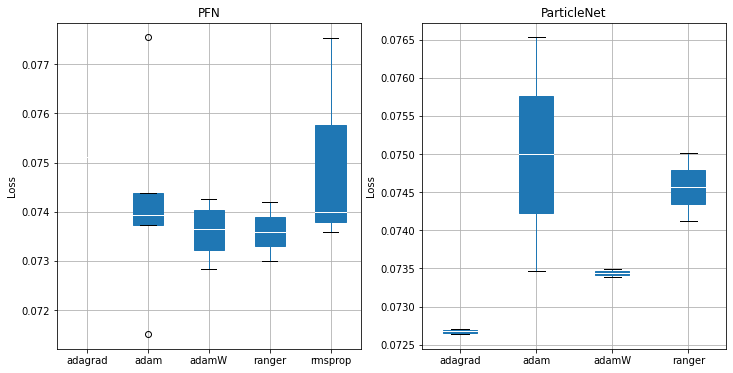

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
pfn_df.pivot(columns='Optimizer', values='Loss').boxplot(
    ax=ax1,
    patch_artist=True,
    medianprops={'color': 'white'},
)
particlenet_df.pivot(columns='Optimizer', values='Loss').boxplot(
    ax=ax2,
    patch_artist=True,
    medianprops={'color': 'white'},
)

ax1.set_title('PFN')
ax1.set_ylabel('Loss')
ax2.set_title('ParticleNet')
ax2.set_ylabel('Loss')

plt.show()

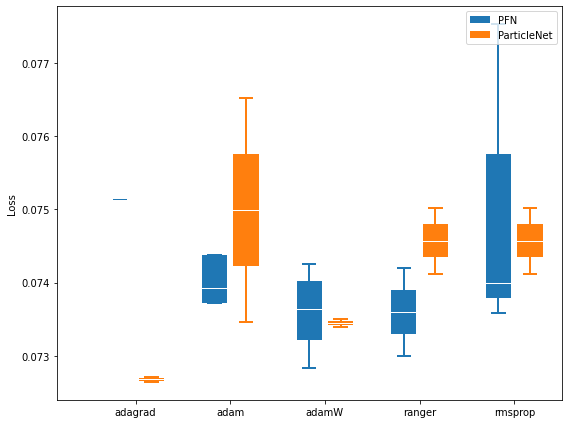

In [220]:
fig, ax = plt.subplots(figsize=(8, 6))

pfn_pivoted = pfn_df.pivot(columns='Optimizer', values='Loss')
pfn_data = [pfn_pivoted[col].dropna().values for col in pfn_pivoted.columns]

particlenet_pivoted = particlenet_df.pivot(columns='Optimizer', values='Loss')
particlenet_data = [particlenet_pivoted[col].dropna().values for col in particlenet_pivoted.columns]
particlenet_data.append(np.array([0.0741231, 0.0750205]))

labels = ['adagrad', 'adam', 'adamW', 'ranger', 'rmsprop']

bp1 = ax.boxplot(
    pfn_data, sym='', positions=np.linspace(1, 13, 5), widths=0.8*np.ones(5), labels=labels, 
    patch_artist=True, medianprops={'color': 'white'},
    boxprops=dict(linewidth=0, facecolor='tab:blue'),
    whiskerprops=dict(linewidth=2, color='tab:blue'),
    capprops=dict(linewidth=2, color='tab:blue')
)
bp2 = ax.boxplot(
    particlenet_data, sym='', positions=np.linspace(2, 14, 5), widths=0.8*np.ones(5), labels=labels, 
    patch_artist=True, medianprops={'color': 'white'},
    boxprops=dict(linewidth=0, facecolor='tab:orange'),
    whiskerprops=dict(linewidth=2, color='tab:orange'),
    capprops=dict(linewidth=2, color='tab:orange')
)

ax.legend([bp1['boxes'][0], bp2['boxes'][0]], ['PFN', 'ParticleNet'], loc='upper right')

ax.set_xticks(np.linspace(1.5, 13.5, 5), labels)
ax.set_xlim([-1, 15])
ax.set_ylabel('Loss')
plt.tight_layout()
plt.show()



## Scatterplots

In [130]:
def plot_scatterplots(df):
    cols = iter(df.columns[7:])
    plot_two = True

    for x in cols:
        try:
            col1, col2 = x, next(cols)
        except:
            plot_two = False

        if plot_two:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.2, 4.6))
            df.plot.scatter(x=col1, y='Loss', ax=ax1)
            df.plot.scatter(x=col2, y='Loss', ax=ax2)
        else:
            df.plot.scatter(x=col1, y='Loss')

        plt.show()

### PFN

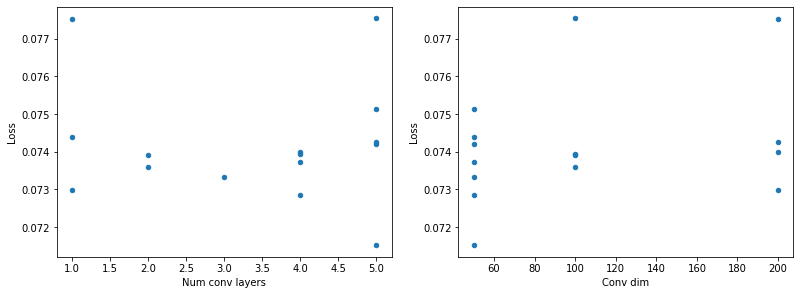

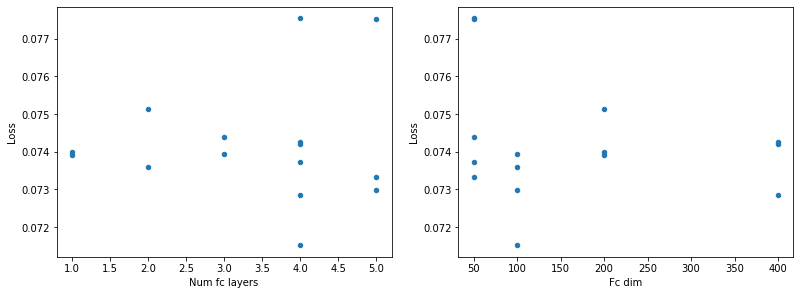

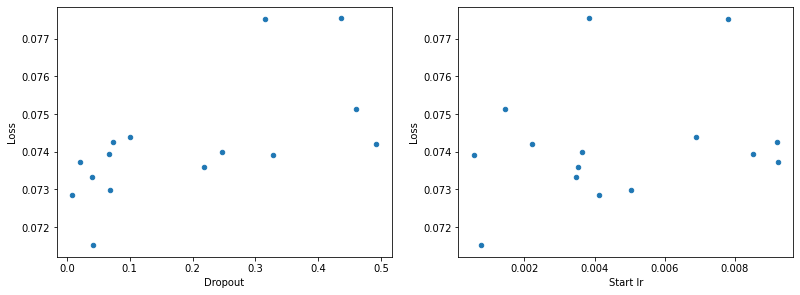

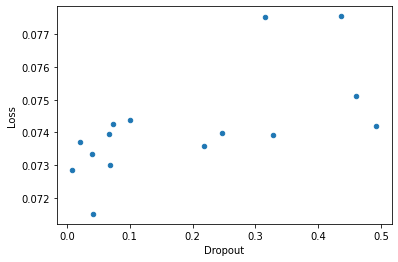

In [131]:
plot_scatterplots(pfn_df)

### ParticleNet

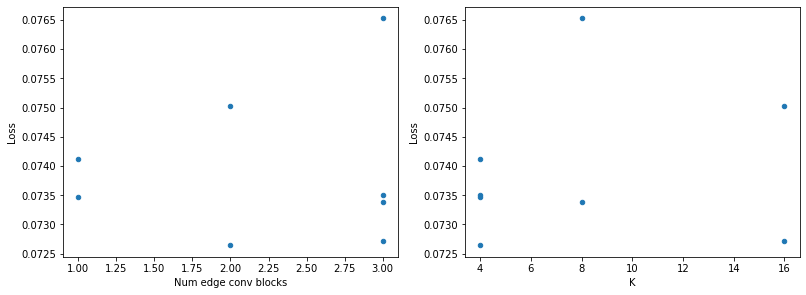

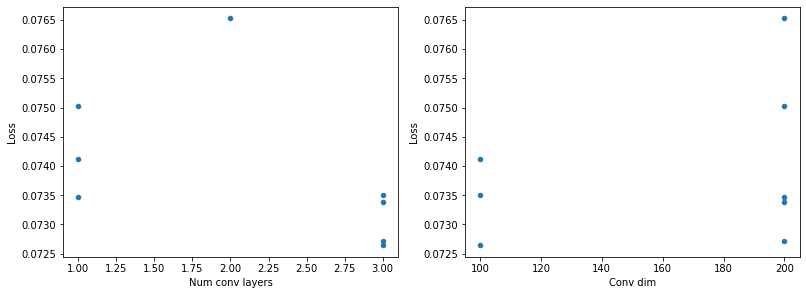

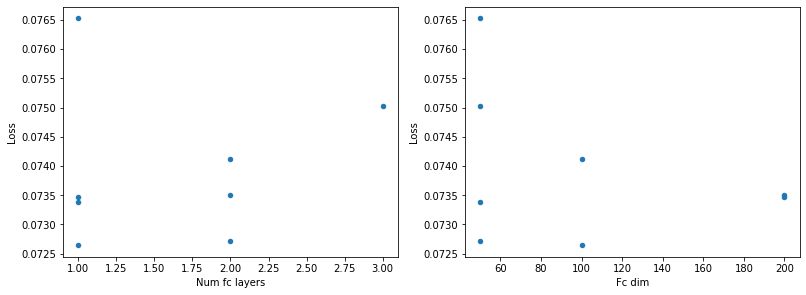

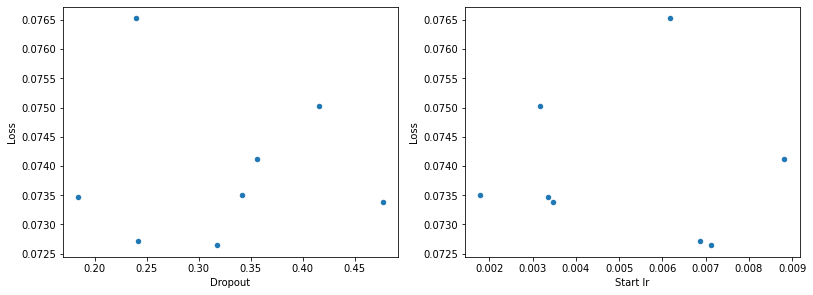

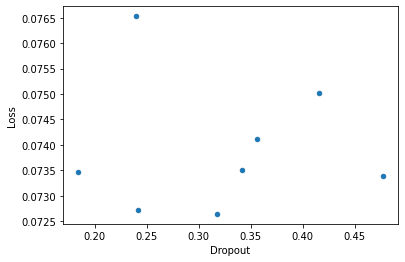

In [132]:
plot_scatterplots(particlenet_df)